In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
import time
%matplotlib inline

import iirrational.v1
import iirrational.plots
from iirrational.testing import iirrational_data
from iirrational import TF_utilities

In [2]:
mpl.rcParams.update({'text.usetex': True,
                     'text.color':'k',
                     'lines.linewidth': 4,
                     'lines.markersize': 12,
                     'font.size': 34, 
                     'font.family': 'FreeSerif',
                     'axes.grid': True,
                     'axes.facecolor' :'w',
                     'axes.labelcolor':'k',
                     'axes.titlesize': 24,
                     'axes.labelsize': 24,
                     'axes.prop_cycle':plt.cycler(color=plt.cm.Dark2.colors),
                     'xtick.color':'k',
                     'xtick.labelsize': 24,
                     'ytick.color':'k',
                     'ytick.labelsize': 24,
                     'grid.color': '#555555',
                     'legend.facecolor':'w',
                     'legend.fontsize': 24,
                     'legend.borderpad': 0.6,
                     'figure.figsize': (16, 12),
                     'figure.facecolor' : 'w'})

(direct = 9.860e+00, Psvd= 9.860e+00, Zsvd= 9.860e+00)
LINEAR Final Residuals:  4.00333828577
(direct = 5.185e+00, Psvd= 5.185e+00, Zsvd= 5.185e+00)
LINEAR Final Residuals:  3.94254006896
Using current
Cleared  zero (-6.95185918354+0j)
Cleared  zero (-0.794031103891+0j)
Initial Order: (Z= 18, P= 20, Z-P= -2)
TRIPLETS (rat = 0.99965418274, pre = 0.967053842889, mid = 0.967053841979, post = 0.965741452951
N:  2
RATIO:  4.20524382319
fit NOT improved from pair at 1.04751847803
RATIO:  4.20524086292
fit NOT improved from pair at 2.04575644243
FINAL RESIDUALS 0.963860736899
(array([ 0.99981098 +2.99693060e-05j,  0.99981098 -2.99693060e-05j,
        0.99997997 +2.10179224e-04j,  0.99997997 -2.10179224e-04j]), array([ 0.99998418+0.j        ,  0.99997826+0.j        ,
        0.99999815+0.00019154j,  0.99999815-0.00019154j,
        0.99998102+0.00057434j,  0.99998102-0.00057434j]), 3.6633737392353663e-08)


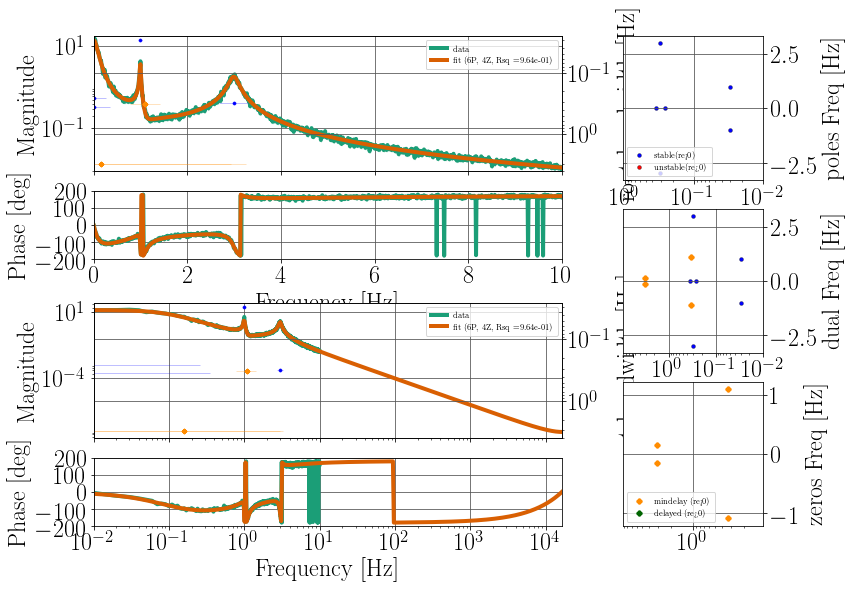

In [3]:
# Run example
dataset = iirrational_data('simple2')
fit = iirrational.v1.data2filter(
    data = dataset.data,
    F_Hz = dataset.F_Hz,
    SNR  = dataset.SNR,
    F_nyquist_Hz = 16384,
)

#see the ZPK generated (Z-domain with the provided Nyquist frequency)
print(fit.fitter.ZPK)

#plot the output
ax = iirrational.plots.plot_fitter_flag(fit.fitter)

In [4]:
# iirrational.plots.plot_fitter_flag??

In [5]:
dataset.SNR

10

In [6]:
print(fit.fitter.ZPK)

(array([ 0.99981098 +2.99693060e-05j,  0.99981098 -2.99693060e-05j,
        0.99997997 +2.10179224e-04j,  0.99997997 -2.10179224e-04j]), array([ 0.99998418+0.j        ,  0.99997826+0.j        ,
        0.99999815+0.00019154j,  0.99999815-0.00019154j,
        0.99998102+0.00057434j,  0.99998102-0.00057434j]), 3.6633737392353663e-08)


In [7]:
Z, P, K = fit.fitter.ZPK
zeros, poles, gain = fit.fitter_lowres_max.ZPK

nyquist = fit.fitter.F_nyquist_Hz
fs = 2.0*nyquist

print 'Sampling Freq =', fs
print 'Nyquist Freq =', nyquist
print 'Zeros =', Z
print 'Poles =', P
print 'Gain  =', K

Sampling Freq = 32768.0
Nyquist Freq = 16384
Zeros = [ 0.99981098 +2.99693060e-05j  0.99981098 -2.99693060e-05j
  0.99997997 +2.10179224e-04j  0.99997997 -2.10179224e-04j]
Poles = [ 0.99998418+0.j          0.99997826+0.j          0.99999815+0.00019154j
  0.99999815-0.00019154j  0.99998102+0.00057434j  0.99998102-0.00057434j]
Gain  = 3.66337373924e-08


In [8]:
import scipy.signal as sig

In [9]:
def dB2Mag(x):
    return 10**(x/20.0)

In [10]:
# testLTI = sig.ZerosPolesGain(Z, P, K*nyquist**2)
# print testLTI
# num, den = sig.zpk2tf(Z, P, K*nyquist**2)
# print num
# print den

# testLTI2 = sig.TransferFunction(num, den)
# print testLTI2

# controlTest = control.tf(num,den)
# control.bode_plot(controlTest)

In [11]:
# ff = np.logspace(-2, 4, 1000000)

# # ww, resp = sig.freqresp(testLTI)

# ww, magdB, phase = sig.bode(testLTI, 2.0*np.pi*ff) # returned in dB and degrees...
# ww, magdB2, phase2 = sig.bode(testLTI2, 2.0*np.pi*ff)

# print ww
# print mag
# print phase

In [12]:
# Import SRCL/DARM TF
gitDir = os.path.expanduser('~/Git/Feedforward/data/20180503/')
filename = '20180503_DARMTFs_GPSStart_1182657618_Duration_900s_Averages_900_BinWidth_1p0Hz.txt'
txtData = np.loadtxt(gitDir + filename)

SRCLDARMFreq = txtData[:,0]
SRCLDARMTF = txtData[:,1] * np.exp(1j*txtData[:,2])
SRCLDARMLabel = 'SRCL/DARM Meas TF'

In [13]:
# Import SRCL/DARM TF
gitDir = os.path.expanduser('~/Git/Feedforward/data/20180503/')
filename = '20180503_DARMCoherence_GPSStart_1182657618_Duration_900s_Averages_900_BinWidth_1p0Hz.txt'
txtData = np.loadtxt(gitDir + filename)

SRCLDARMCohFreq = txtData[:,0]
SRCLDARMCoh = txtData[:,1]
SRCLDARMCohLabel = 'SRCL/DARM Coherence'

In [14]:
# Remove certain frequencies for cal lines, violin modes, roll and bounce modes, and some weirdness with nyquist
calLineFreqRange = np.array([32.0, 40.0])
calLineFreqRange2 = np.array([320.0, 340.0])
calLineFreqRange3 = np.array([1082.0, 1084.0])
calLineFreqRange4 = np.array([3500.0, 3503.0])
calLineFreqRange5 = np.array([4000.0, 4003.0])

mainsFreqRange = np.array([59.0, 61.0])
mainsHarmonicsFreqRange = mainsFreqRange * 2

violinModeFreqRange = np.array([490.0, 520.0])
violinModeHarmonicsFreqRange = violinModeFreqRange * 2
violinModeHarmonicsFreqRange2 = violinModeHarmonicsFreqRange * 2

highCohPeakFreqRange = np.array([3200.0, 3500.0])

fs = 16384.0
nyquist = fs/2.0
nyquistPoint = np.array([nyquist, nyquist])

removalFreqRanges = np.array([calLineFreqRange, calLineFreqRange2, calLineFreqRange3, calLineFreqRange4, \
                              calLineFreqRange5, \
                              violinModeFreqRange, violinModeHarmonicsFreqRange, violinModeHarmonicsFreqRange2, \
                              nyquistPoint, mainsFreqRange, mainsHarmonicsFreqRange, highCohPeakFreqRange])
removalDataSets = np.array([SRCLDARMFreq, SRCLDARMTF, SRCLDARMCohFreq, SRCLDARMCoh])

In [15]:
# Do the removal
for freqRange in removalFreqRanges:
    lowerRange = freqRange[0]
    upperRange = freqRange[1]
    
    removalIndicies = np.argwhere((lowerRange < SRCLDARMFreq) & (SRCLDARMFreq < upperRange)).flatten()
    SRCLDARMFreq = np.delete(SRCLDARMFreq, removalIndicies)
    SRCLDARMTF = np.delete(SRCLDARMTF, removalIndicies)
    
    removalIndicies = np.argwhere((lowerRange < SRCLDARMCohFreq) & (SRCLDARMCohFreq < upperRange)).flatten()
    SRCLDARMCohFreq = np.delete(SRCLDARMCohFreq, removalIndicies)
    SRCLDARMCoh = np.delete(SRCLDARMCoh, removalIndicies)

In [16]:
# estimate SNR from coherence using SNR = Coh/(1-Coh) # my Coh is power Coherence = |Pxy|^2/(Pxx*Pyy)
# Reference: https://pdfs.semanticscholar.org/b372/8d8d29e049953589b09d13becffa0daee763.pdf
SRCLDARMSNR = SRCLDARMCoh/(1.0 - SRCLDARMCoh)

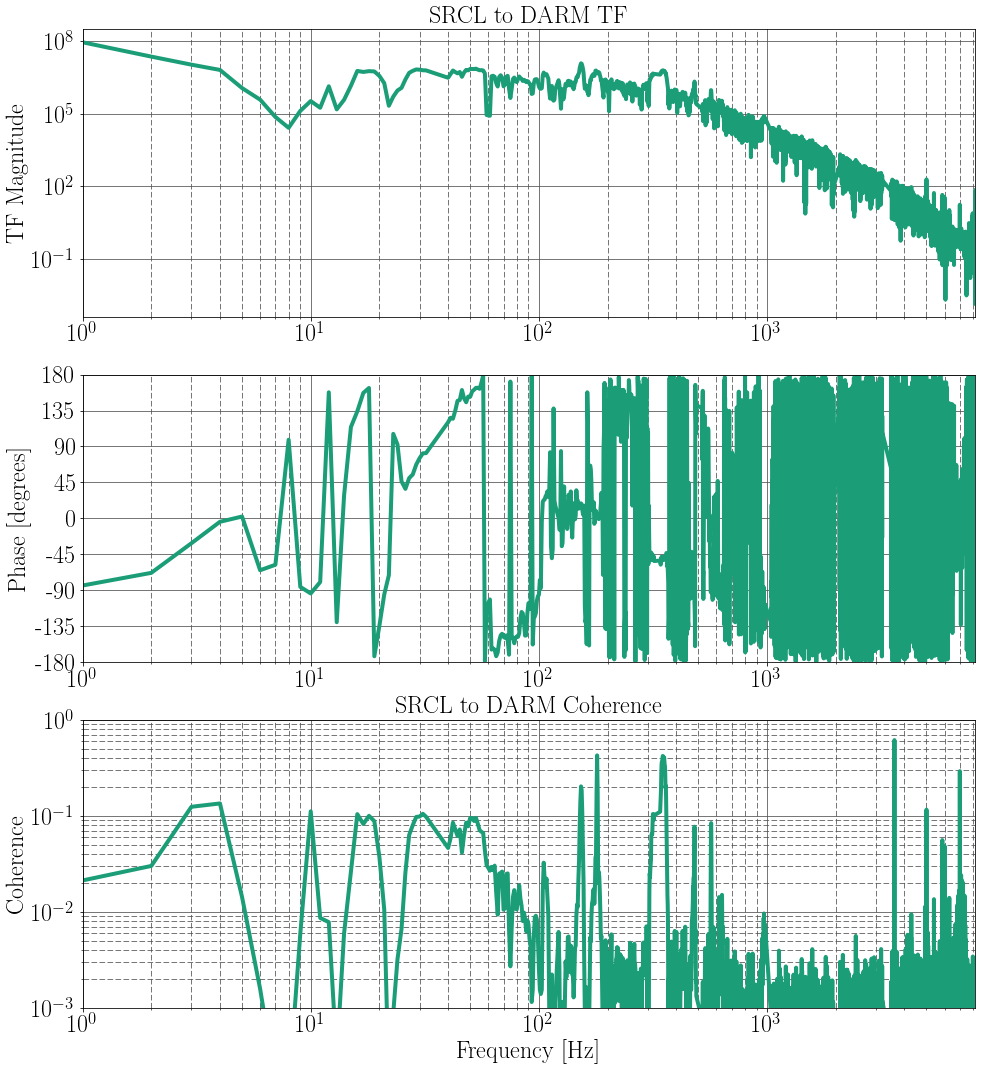

In [17]:
fig = plt.figure(figsize=(16,18))
s1 = plt.subplot(311)
s2 = plt.subplot(312)
s3 = plt.subplot(313)

s1.loglog(SRCLDARMFreq, np.abs(SRCLDARMTF))

s2.semilogx(SRCLDARMFreq, 180.0/np.pi*np.angle(SRCLDARMTF))

s1.set_ylabel('TF Magnitude')
s1.set_title('SRCL to DARM TF')
# s2.set_xlabel('Frequency [Hz]')
s2.set_ylabel('Phase [degrees]')

s1.set_xlim([min(SRCLDARMFreq), max(SRCLDARMFreq)])
s2.set_xlim([min(SRCLDARMFreq), max(SRCLDARMFreq)])
s2.set_ylim([-180,180])

s2.set_yticks(np.arange(-180,181,45))
s2.set_yticklabels(np.arange(-180,181,45))

s1.grid(which='minor', ls='--')
s2.grid(which='minor', ls='--')

# Plot coherence as well
# fig = plt.figure(figsize=(16,6))

s3.loglog(SRCLDARMCohFreq, SRCLDARMCoh, label=SRCLDARMCohLabel)
s3.set_title('SRCL to DARM Coherence')
s3.set_xlabel('Frequency [Hz]')
s3.set_ylabel('Coherence')

s3.set_xlim([SRCLDARMCohFreq[0], SRCLDARMCohFreq[-1]])
s3.set_ylim([10**-3, 1])
s3.grid(which='minor', ls='--')
plt.show()

In [18]:
# Do the SRCL to DARM TF fit
print nyquist
fit2 = iirrational.v1.data2filter(
    data = SRCLDARMTF,
    F_Hz = SRCLDARMFreq,
    F_nyquist_Hz = nyquist+1,
)

8192.0
(direct = 7.448e+03, Psvd= 7.448e+03, Zsvd= 7.448e+03)
LINEAR Final Residuals:  11512.5641239
(direct = 1.328e+03, Psvd= 1.328e+03, Zsvd= 1.328e+03)
LINEAR Final Residuals:  2537.67256416
Using last (reduced)! 20
Cleared  pole (1.00833810582+0j)
Cleared  pole (1.15442932175+0j)
Cleared  zero (1.17340517297+0j)
Initial Order: (Z= 19, P= 18, Z-P= 1)
TRIPLETS (rat = 0.999389180426, pre = 0.515450447876, mid = 0.515450447876, post = 0.515068112693
RATIO:  1.02616698584
fit NOT improved from pair at 1938.03423645
RATIO:  1.07412294298
fit NOT improved from pair at 7100.16759146
RATIO:  1.02237465172
fit NOT improved from pair at 2194.87842821
RATIO:  1.0414930093
fit NOT improved from pair at 1469.54189038
REMOVING  Z:  [-0.59663605+0.67858777j -0.59663605-0.67858777j]
REMOVING  Z:  [-0.99986881+0.01184513j -0.99986881-0.01184513j]
REMOVING  Z:  [-1.03212409+0.25322014j -1.03212409-0.25322014j]
REMOVING  Z:  [-1.01853626+0.02950823j -1.01853626-0.02950823j]
REMOVING  P:  [-0.99545427

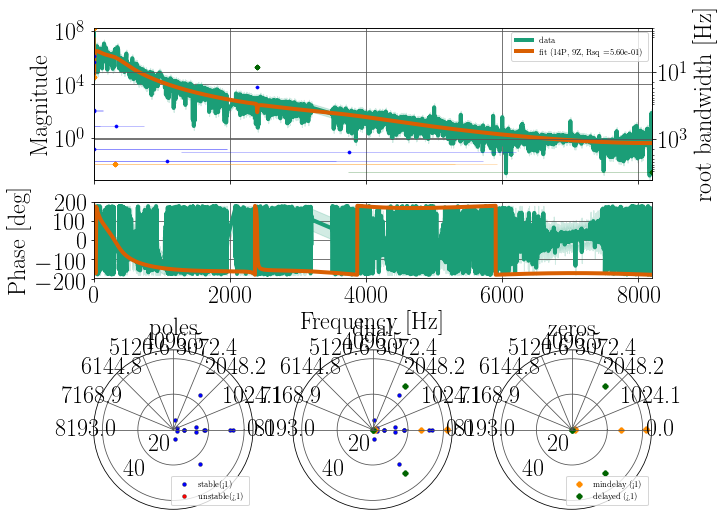

In [19]:
#plot the output
ax = iirrational.plots.plot_fitter_flag(fit2.fitter)

In [20]:
# Try freqz_zpk from scipy signal
Z, P, K = fit2.fitter.ZPK

ww, hh = sig.freqz_zpk(Z, P, K, worN=np.pi*SRCLDARMFreq/nyquist)
ff = nyquist * ww/np.pi

In [21]:
zeros, poles, gain = TF_utilities.ZtoS(fit2.fitter.ZPK, fit2.fitter.F_nyquist_Hz, 100.0) # This doesn't work great...
zeros = 2.0*np.pi * np.array(zeros)
poles = 2.0*np.pi * np.array(poles)
gain = 4.0*np.pi**2 * gain

In [22]:
testLTI = sig.ZerosPolesGain(zeros, poles, gain)
ww, scipyMagdB, scipyPhase = sig.bode(testLTI, 2.0*np.pi*SRCLDARMFreq)
scipyPhase = ( scipyPhase + 180.0) % (2 * 180.0 ) - 180.0

In [23]:
# Get xfer_function from iirrational
iirrationalTF = fit2.fitter.xfer_fit
print 'Gain Ratio:', np.abs(iirrationalTF)[0]/dB2Mag(scipyMagdB)[0]
print '4 pi**2:', 4.0*np.pi**2

Gain Ratio: 243.95103656
4 pi**2: 39.4784176044


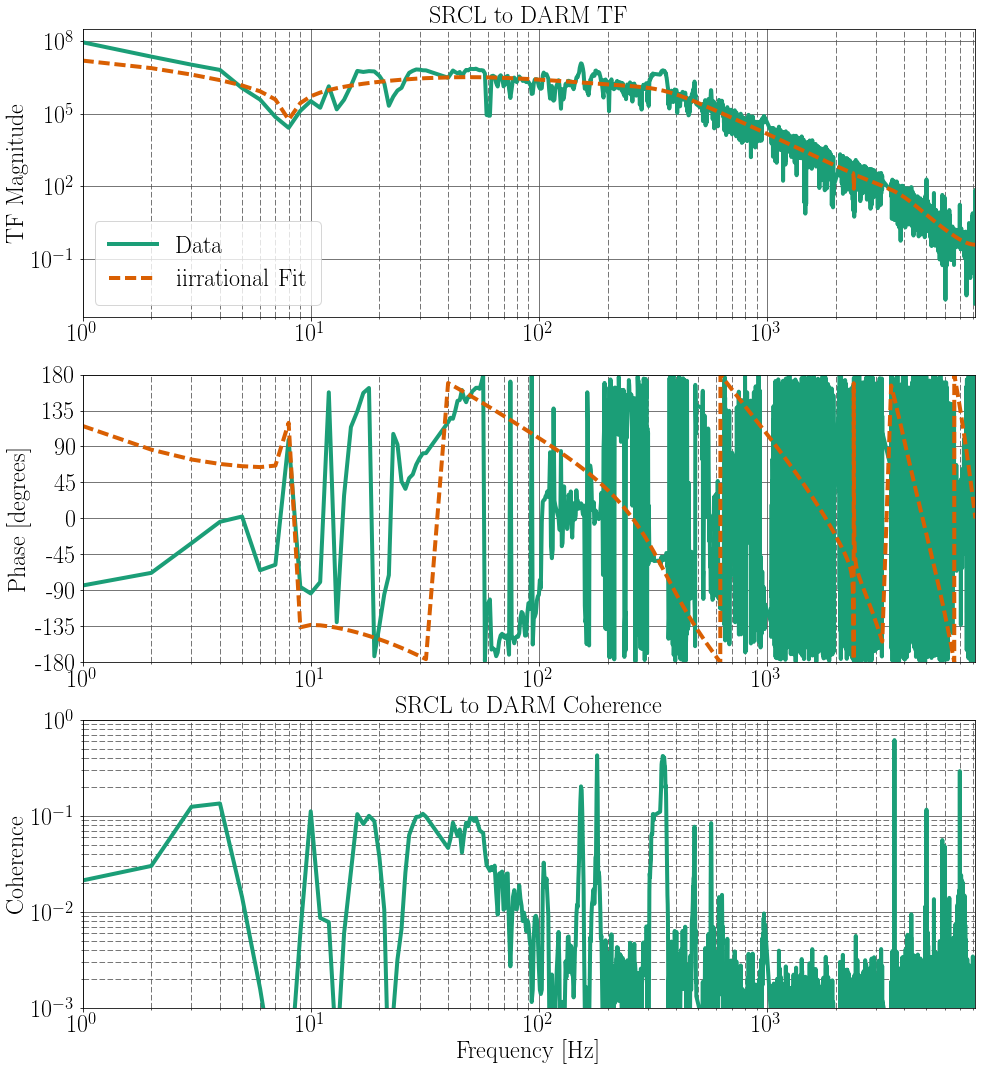

In [24]:
fig = plt.figure(figsize=(16,18))
s1 = plt.subplot(311)
s2 = plt.subplot(312)
s3 = plt.subplot(313)

s1.loglog(SRCLDARMFreq, np.abs(SRCLDARMTF), label='Data')
# s1.loglog(SRCLDARMFreq, dB2Mag(scipyMagdB), label='Fit', lw=4)
# s1.loglog(SRCLDARMFreq, np.abs(iirrationalTF), label='IIRrational Fit')
s1.loglog(SRCLDARMFreq, np.abs(hh), '--', label='iirrational Fit')

s2.semilogx(SRCLDARMFreq, 180.0/np.pi*np.angle(SRCLDARMTF))
# s2.semilogx(SRCLDARMFreq, scipyPhase, lw=4)
# s2.semilogx(SRCLDARMFreq, 180.0/np.pi*np.angle(iirrationalTF))
s2.semilogx(SRCLDARMFreq, 180.0/np.pi*np.angle(hh),'--')

s1.set_ylabel('TF Magnitude')
s1.set_title('SRCL to DARM TF')
s2.set_ylabel('Phase [degrees]')

s1.set_xlim([min(SRCLDARMFreq), max(SRCLDARMFreq)])
s2.set_xlim([min(SRCLDARMFreq), max(SRCLDARMFreq)])
s2.set_ylim([-180,180])

s2.set_yticks(np.arange(-180,181,45))
s2.set_yticklabels(np.arange(-180,181,45))

s1.grid(which='minor', ls='--')
s2.grid(which='minor', ls='--')

s1.legend(loc='lower left')

s3.loglog(SRCLDARMCohFreq, SRCLDARMCoh, label=SRCLDARMCohLabel)
s3.set_title('SRCL to DARM Coherence')
s3.set_xlabel('Frequency [Hz]')
s3.set_ylabel('Coherence')

s3.set_xlim([SRCLDARMCohFreq[0], SRCLDARMCohFreq[-1]])
s3.set_ylim([10**-3, 1])
s3.grid(which='minor', ls='--')
plt.show()

In [54]:
# Import SRCL/DARM TF
gitDir = os.path.expanduser('~/Git/Feedforward/')
filename = 'SRCL_noiseInjection_TF'
txtData = np.loadtxt(gitDir + filename)

SRCLDARMNoiseInjFreq = txtData[:,0]
SRCLDARMNoiseInjTF = txtData[:,1] * np.exp(1j*txtData[:,2])
SRCLDARMNoiseInjLabel = 'SRCL/DARM Meas TF'
SRCLDARMNoiseInjNAvgs = 30

In [55]:
# Import SRCL/DARM TF
gitDir = os.path.expanduser('~/Git/Feedforward/')
filename = 'SRCL_noiseInjection_coherence'
txtData = np.loadtxt(gitDir + filename)

SRCLDARMNoiseInjCohFreq = txtData[:,0]
SRCLDARMNoiseInjCoh = txtData[:,1]
SRCLDARMNoiseInjCohLabel = 'SRCL/DARM Coherence'

In [56]:
# Cut out TF points with low coherence
coherenceThreshold = 0.8

goodIndicies = np.argwhere(coherenceThreshold < SRCLDARMNoiseInjCoh)[:,0]
maskArray = np.ones(len(SRCLDARMNoiseInjFreq))
maskArray[goodIndicies] = 0

MaskSRCLDARMNoiseInjFreq    = np.ma.array(SRCLDARMNoiseInjFreq, mask=maskArray)
MaskSRCLDARMNoiseInjTF      = np.ma.array(SRCLDARMNoiseInjTF, mask=maskArray)
MaskSRCLDARMNoiseInjCohFreq = np.ma.array(SRCLDARMNoiseInjCohFreq, mask=maskArray)
MaskSRCLDARMNoiseInjCoh     = np.ma.array(SRCLDARMNoiseInjCoh, mask=maskArray)

In [57]:
# relative variance = (1 - coh)/(2* Navgs * coh), where coh = coherence = |Pxy|**2/(Pxx*Pyy)
SRCLDARMNoiseInjVar = (1.0 - SRCLDARMNoiseInjCoh)/(2 * SRCLDARMNoiseInjNAvgs * SRCLDARMNoiseInjCoh)
SRCLDARMNoiseInjStd = np.sqrt(SRCLDARMNoiseInjVar)

In [58]:
# Define clean uncertainty bars
SRCLDARMNoiseInjMagUpperUnc = np.abs(SRCLDARMNoiseInjTF) * (1.0 + SRCLDARMNoiseInjStd)
SRCLDARMNoiseInjMagLowerUnc = np.abs(SRCLDARMNoiseInjTF) * (1.0 - SRCLDARMNoiseInjStd)
badIndicies = np.argwhere(SRCLDARMNoiseInjMagLowerUnc < 0.0)[:,0]
SRCLDARMNoiseInjMagLowerUnc[badIndicies] = min(np.abs(SRCLDARMNoiseInjTF))

SRCLDARMNoiseInjPhaseUpperUnc = np.angle(SRCLDARMNoiseInjTF * np.exp(1j*SRCLDARMNoiseInjStd))
SRCLDARMNoiseInjPhaseLowerUnc = np.angle(SRCLDARMNoiseInjTF * np.exp(-1j*SRCLDARMNoiseInjStd))

In [59]:
SRCLDARMNoiseInjFreq    = SRCLDARMNoiseInjFreq[goodIndicies]
SRCLDARMNoiseInjTF      = SRCLDARMNoiseInjTF[goodIndicies]
SRCLDARMNoiseInjCohFreq = SRCLDARMNoiseInjCohFreq[goodIndicies]
SRCLDARMNoiseInjCoh     = SRCLDARMNoiseInjCoh[goodIndicies]

In [60]:
fit3 = iirrational.v1.data2filter(
    data = SRCLDARMNoiseInjTF,
    F_Hz = SRCLDARMNoiseInjFreq,
    F_nyquist_Hz = nyquist,
)
Z3, P3, K3 = fit3.fitter.ZPK
ff3 = np.logspace(np.log10(SRCLDARMNoiseInjFreq[0]), np.log10(SRCLDARMNoiseInjFreq[-1]), 1000)
ww3, fit3SRCLDARMTF = sig.freqz_zpk(Z3, P3, K3, worN=np.pi*ff3/nyquist)

(direct = 2.189e-01, Psvd= 2.189e-01, Zsvd= 2.189e-01)
LINEAR Final Residuals:  0.0214490092767
(direct = 7.210e-02, Psvd= 7.210e-02, Zsvd= 7.210e-02)
LINEAR Final Residuals:  0.0170810102313
(direct = 2.248e-02, Psvd= 2.248e-02, Zsvd= 2.248e-02)
LINEAR Final Residuals:  0.196561917103
Using last (direct)! 40
Cleared  pole (-0.999768816423+0j)
Cleared  pole (-0.82193513161+0j)
Cleared  zero (-1.74260275827+0j)
Cleared  zero (-0.999843228926+0j)
Cleared  zero (1.431949193+0j)
Cleared  zero (3.54145773634+0j)
Initial Order: (Z= 36, P= 38, Z-P= -2)
TRIPLETS (rat = 1.00039086988, pre = 0.00616089478601, mid = 0.00616079595793, post = 0.00616079595793
N:  2
RATIO:  3.56235837614
fit NOT improved from pair at 481.149119494
RATIO:  10.4462722915
fit NOT improved from pair at 273.374972312
RATIO:  3.70724333825
fit NOT improved from pair at 138.994147993
RATIO:  3.70781868279
fit NOT improved from pair at 138.993544785
REMOVING  Z:  [-0.98595952]
REMOVING  Z:  [-0.98105427]
REMOVING  Z:  [-0.9

In [64]:
fig = plt.figure(figsize=(16,18))
s1 = plt.subplot(311)
s2 = plt.subplot(312)
s3 = plt.subplot(313)

s1.loglog(MaskSRCLDARMNoiseInjFreq, np.abs(MaskSRCLDARMNoiseInjTF), label='SRCL Noise Inj to DARM TF')
s1.fill_between(MaskSRCLDARMNoiseInjFreq, SRCLDARMNoiseInjMagLowerUnc, SRCLDARMNoiseInjMagUpperUnc, alpha=0.5, label='Unc')
s1.loglog(ff3, np.abs(fit3SRCLDARMTF), label='iirrational Fit')

s2.semilogx(MaskSRCLDARMNoiseInjFreq, 180.0/np.pi*np.angle(MaskSRCLDARMNoiseInjTF))
s2.fill_between(MaskSRCLDARMNoiseInjFreq,  \
                180.0/np.pi*SRCLDARMNoiseInjPhaseLowerUnc, \
                180.0/np.pi*SRCLDARMNoiseInjPhaseUpperUnc, alpha=0.5)
s2.semilogx(ff3, 180.0/np.pi*np.angle(fit3SRCLDARMTF))

s1.set_title('SRCL Noise Inj to DARM TF')
s1.set_ylabel('TF Magnitude')
s1.set_xlim([min(SRCLDARMNoiseInjFreq), max(SRCLDARMNoiseInjFreq)])
s1.set_ylim([10**np.floor(np.log10(min(np.abs(SRCLDARMNoiseInjTF)))), \
             2.0*max(np.abs(SRCLDARMNoiseInjTF))])
s1.grid(which='minor', ls='--')
s1.legend(loc='best', ncol=3)

s2.set_ylabel('Phase [degrees]')
s2.set_xlim([min(SRCLDARMNoiseInjFreq), max(SRCLDARMNoiseInjFreq)])
s2.set_ylim([-180,180])
s2.set_yticks(np.arange(-180,181,45))
s2.set_yticklabels(np.arange(-180,181,45))
s2.grid(which='minor', ls='--')

s3.semilogx(MaskSRCLDARMNoiseInjCohFreq, MaskSRCLDARMNoiseInjCoh, label=SRCLDARMNoiseInjCohLabel)
s3.set_title('SRCL to DARM Coherence')
s3.set_xlabel('Frequency [Hz]')
s3.set_ylabel('Coherence')
s3.set_xlim([min(SRCLDARMNoiseInjFreq), max(SRCLDARMNoiseInjFreq)])
s3.grid(which='minor', ls='--')
plt.show()